# clip-05s.jl

Load Julia packages (libraries) needed

In [1]:
using StatisticalRethinking, CmdStan
gr(size=(500,800));

CmdStan uses a tmp directory to store the output of cmdstan

In [2]:
ProjDir = rel_path("..", "scripts", "03")
cd(ProjDir)

Define the Stan language model

In [3]:
binomialstanmodel = "
// Inferring a Rate
data {
  int N;
  int<lower=0> k[N];
  int<lower=1> n[N];
}
parameters {
  real<lower=0,upper=1> theta;
  real<lower=0,upper=1> thetaprior;
}
model {
  // Prior Distribution for Rate Theta
  theta ~ beta(1, 1);
  thetaprior ~ beta(1, 1);

  // Observed Counts
  k ~ binomial(n, theta);
}
";

Define the Stanmodel and set the output format to :mcmcchains.

In [4]:
stanmodel = Stanmodel(name="binomial", monitors = ["theta"], model=binomialstanmodel,
  output_format=:mcmcchains);
# Use 16 observations
N2 = 4^2
d = Binomial(9, 0.66)
n2 = Int.(9 * ones(Int, N2))
k2 = rand(d, N2);


File /var/folders/fb/m164mwfn3v1btnrpmmyzpvqh0000gn/T/jl_vIf3Wi/binomial.stan will be updated.



Input data for cmdstan

In [5]:
binomialdata = Dict("N" => length(n2), "n" => n2, "k" => k2);

Sample using cmdstan

In [6]:
rc, chn, cnames = stan(stanmodel, binomialdata, ProjDir, diagnostics=false,
  CmdStanDir=CMDSTAN_HOME);
# Describe the draws
describe(chn)


Inference for Stan model: binomial_model
4 chains: each with iter=(1000,1000,1000,1000); warmup=(0,0,0,0); thin=(1,1,1,1); 4000 iterations saved.

Warmup took (0.026, 0.026, 0.026, 0.027) seconds, 0.10 seconds total
Sampling took (0.043, 0.032, 0.036, 0.033) seconds, 0.14 seconds total

                Mean     MCSE  StdDev     5%   50%   95%    N_Eff  N_Eff/s    R_hat
lp__             -96  2.8e-02     1.1    -99   -96   -95  1.6e+03  1.1e+04  1.0e+00
accept_stat__   0.89  2.3e-03    0.15   0.57  0.95   1.0  4.3e+03  3.0e+04  1.0e+00
stepsize__      0.88  3.7e-02   0.052   0.83  0.92  0.95  2.0e+00  1.4e+01  3.4e+13
treedepth__      1.8  9.2e-03    0.54    1.0   2.0   3.0  3.4e+03  2.3e+04  1.0e+00
n_leapfrog__     3.6  1.8e-01     3.2    1.0   3.0   7.0  3.2e+02  2.2e+03  1.0e+00
divergent__     0.00      nan    0.00   0.00  0.00  0.00      nan      nan      nan
energy__          97  4.0e-02     1.5     96    97   100  1.4e+03  9.6e+03  1.0e+00
theta           0.66  6.7e-04   0.039  

2-element Array{ChainDataFrame,1}

Summary Statistics
. Omitted printing of 2 columns
│ Row │ parameters │ mean     │ std       │ naive_se    │ mcse        │
│     │ Symbol     │ Float64  │ Float64   │ Float64     │ Float64     │
├─────┼────────────┼──────────┼───────────┼─────────────┼─────────────┤
│ 1   │ theta      │ 0.658161 │ 0.0390653 │ 0.000617677 │ 0.000746573 │

Quantiles

│ Row │ parameters │ 2.5%    │ 25.0%    │ 50.0%    │ 75.0%    │ 97.5%    │
│     │ Symbol     │ Float64 │ Float64  │ Float64  │ Float64  │ Float64  │
├─────┼────────────┼─────────┼──────────┼──────────┼──────────┼──────────┤
│ 1   │ theta      │ 0.58042 │ 0.632451 │ 0.658514 │ 0.684334 │ 0.732186 │


Plot the 4 chains

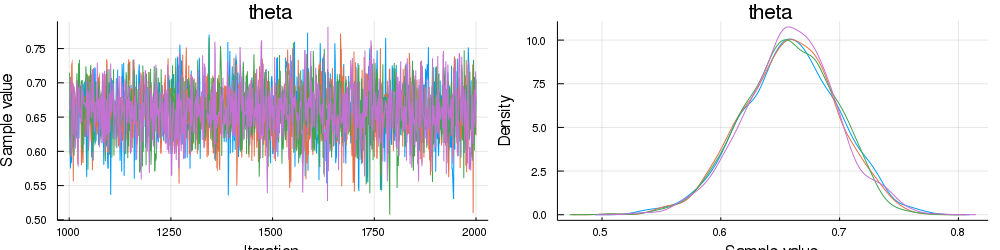

In [7]:
if rc == 0
  plot(chn)
end

End of `03/clip-05s.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*